# **Introduction**

  In today's world, where most people are online for various aspects of their lives. One of the significant transformations facilitated by this digital age is the widespread adoption of online transactions and digital payment systems.

  While these advancements have undoubtedly revolutionized the way we conduct financial transactions, they have also given rise to a pressing concern – the pervasive threat of online payment fraud.As individuals increasingly turn to the internet for shopping, banking, and other financial transactions, the risk of falling victim to various forms of online payment fraud becomes more prevalent.

This project endeavors to unravel the shadows cast by online payment fraud, delving into its diverse manifestations, underlying causes, and the measures that can be employed to safeguard the integrity of digital transactions.

# **Importing necessary libraries:**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# **Loading Dataset:**

From the Data we can see that it has 11 features. These features are as following:

* **step -** maps a unit of time in the real world. In this case 1 step is
1 hour of time. Total steps 744 (30 days simulation).

* **type -** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* **amount -**  amount of the transaction in local currency.

* **nameOrig -** customer who started the transaction

* **oldbalanceOrg -** initial balance before the transaction

* **newbalanceOrig -** new balance after the transaction

* **nameDest -** customer who is the recipient of the transaction

* **oldbalanceDest -** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* **newbalanceDest -** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* **isFraud -** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* **isFlaggedFraud -** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Accredian/Fraud.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


# **Transaction Type Distribution:**

In [ ]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Transaction Type')

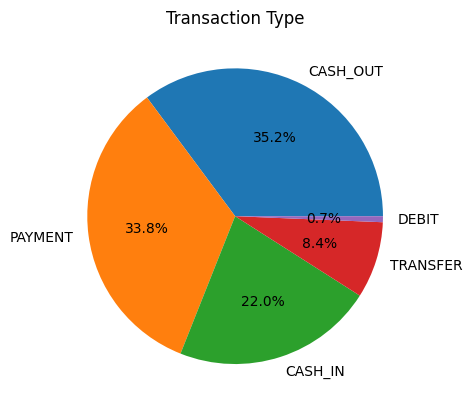

In [ ]:
plt.pie(data['type'].value_counts().values,labels = data['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Transaction Type')

From the pie chart, we can observe that approximately 70% of transactions are PAYMENT and CASH_OUT type. And remaining types (DEBIT, TRANSFER, CASH_IN) are about 30%.



In [ ]:
fraud_df = data[data['isFraud'] == 1]
fraud_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


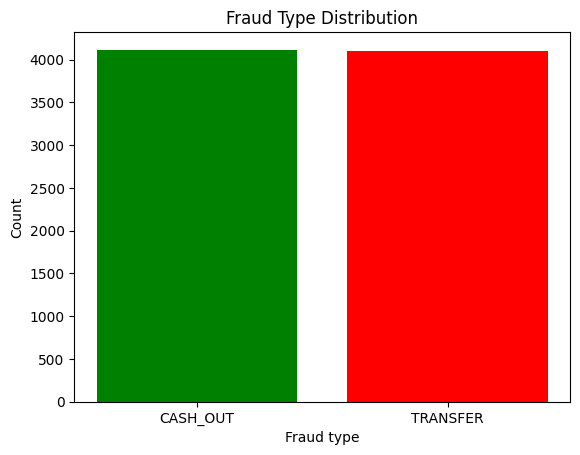

In [ ]:
fraud_type_count = fraud_df['type'].value_counts()
print(fraud_type_count)
plt.bar(fraud_type_count.index, fraud_type_count.values, color=['green', 'red'],)
plt.xlabel('Fraud type')
plt.ylabel('Count')
plt.title('Fraud Type Distribution')
plt.xticks(fraud_type_count.index, ['CASH_OUT', 'TRANSFER'])
plt.show()

The Bar Chart shows that frauds are made from CASH_OUT and TRANSFER type transactions.

The above pie chart shows that approximately 44% of transaction types are CASH_OUT and TRANSFER. Which is a big percentage and increases the risk of Fraud

In [ ]:
data['type'] = data['type'].map({'CASH_OUT': 1, 'DEBIT': 2, 'TRANSFER': 3, 'CASH_IN': 4, 'PAYMENT': 5})
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,5,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,5,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,5,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,5,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,5,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,5,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,5,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,2,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# **Relation Between the Features**

In [ ]:
correlation = data.corr()
correlation

<ipython-input-10-521f87fcc686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010743,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.010743,1.000000,-0.107542,0.130510,0.138663,-0.157395,-0.175087,-0.024877,-0.000172
amount,0.022373,-0.107542,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.130510,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.138663,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.157395,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.175087,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,-0.024877,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,-0.000172,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

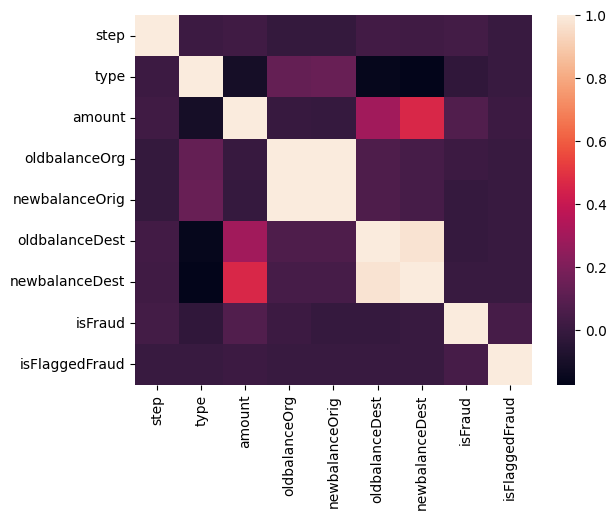

In [ ]:
sns.heatmap(correlation)

In [ ]:
correlation['isFraud'].reset_index().sort_values('isFraud',ascending = False)

,index,isFraud
7,isFraud,1.000000
2,amount,0.076688
8,isFlaggedFraud,0.044109
0,step,0.031578
3,oldbalanceOrg,0.010154
6,newbalanceDest,0.000535
5,oldbalanceDest,-0.005885
4,newbalanceOrig,-0.008148
1,type,-0.024877


From the heatmap and the table above we can observe that the 'amount', 'isFlaggedFraud', 'step', and 'oldbalanceOrg' have high correlation values for 'isFraud'.


Considering the correlation values and observing the data, 4 features are most considerable and valuable for predicting fraud transactions. These are:



*   **type:** Although it does not have a good correlation value most of the fraud transactions are of type CASH_OUT and TRANSACTION and these transactions are about 45% of all the transactions.   

*   **amount:** It has the highest correlation value among all the features. In the fraud transactions, we can observe that the value of the amount is the same as the account balance of the customer.


*   **oldbalanceOrg:** It shows the bank balance of the customer before the transaction is made. In the case of fraud transactions, the amount and the bank balance are the same.
   
*   **newbalanceOrig**: It shows the bank balance of the customer after the transaction is made. In the case of fraud transactions, its value is 0 after the transaction.





In [ ]:
fraud_data = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]
fraud_data.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,5,9839.64,170136.00,160296.36,0
1,5,1864.28,21249.00,19384.72,0
2,3,181.00,181.00,0.00,1
3,1,181.00,181.00,0.00,1
4,5,11668.14,41554.00,29885.86,0
5,5,7817.71,53860.00,46042.29,0
6,5,7107.77,183195.00,176087.23,0
7,5,7861.64,176087.23,168225.59,0
8,5,4024.36,2671.00,0.00,0
9,2,5337.77,41720.00,36382.23,0


# **Data Cleaning**

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

From the above cell, we can see that there are no NULL values in the data.

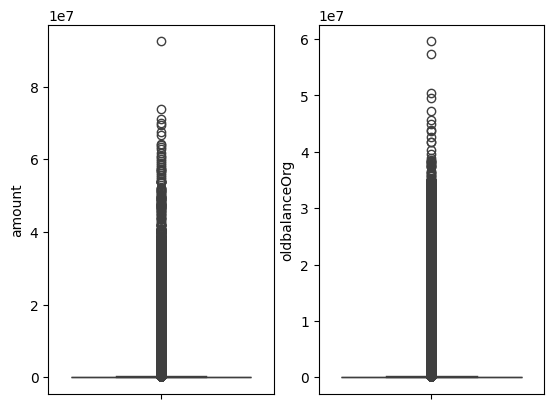

In [ ]:
fig, ax = plt.subplots(1,2)
sns.boxplot(fraud_data['amount'], ax=ax[0])
sns.boxplot(fraud_data['oldbalanceOrg'], ax=ax[1])
fig.show()

There are some Outliers in the Data as we can see in the above bocplots.

In the below cell, we removed these Outliers.

In [ ]:
fraud_data = fraud_data[(fraud_data['amount'] < 80000000) & (fraud_data['oldbalanceOrg'] < 50000000)]
fraud_data.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,5,9839.64,170136.00,160296.36,0
1,5,1864.28,21249.00,19384.72,0
2,3,181.00,181.00,0.00,1
3,1,181.00,181.00,0.00,1
4,5,11668.14,41554.00,29885.86,0
5,5,7817.71,53860.00,46042.29,0
6,5,7107.77,183195.00,176087.23,0
7,5,7861.64,176087.23,168225.59,0
8,5,4024.36,2671.00,0.00,0
9,2,5337.77,41720.00,36382.23,0


# **Fraud Transactions Distribution**

In [ ]:
fraud_count = fraud_data['isFraud'].value_counts()
fraud_count

0    6354406
1       8210
Name: isFraud, dtype: int64

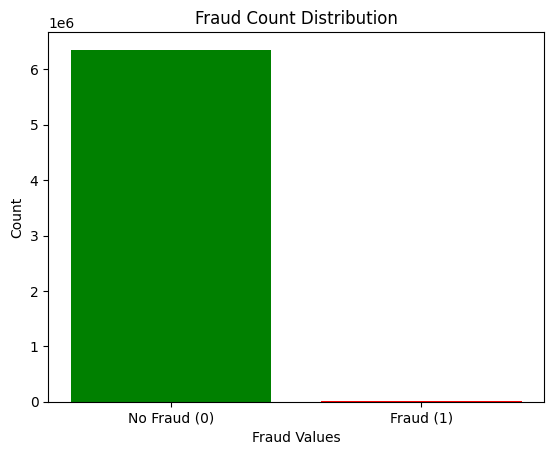

In [ ]:
plt.bar(fraud_count.index, fraud_count.values, color=['green', 'red'])
plt.xlabel('Fraud Values')
plt.ylabel('Count')
plt.title('Fraud Count Distribution')
plt.xticks(fraud_count.index, ['No Fraud (0)', 'Fraud (1)'])
plt.show()

From the above bar graph, we can see that the number of fraudulent transactions is very low as compared to the normal transactions. This type of data is known as imbalanced data. Due to this imbalance in the target values, the model trained from this data is not good and there are very high chance that it can predict wrong on the unseen data.

To overcome this problem there are different methods but we are gonna use the following 2 methods and see which performs better. These methods are:


*   Shifting the threshold for Predictions.
*   Oversampling and Undersampling the Data.


For the imbalanced data, the XGBoost is the well-suited and well preferred algorithm. Therefor we use XGBoost algorithms in this project.

# **Shifting the Threshold for Predictions**

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts

In [ ]:
X = fraud_data.drop(['isFraud'], axis='columns')
y = fraud_data.isFraud

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state = 0)

In [ ]:
model_1 = XGBClassifier(
              learning_rate =0.1,
              n_estimators=200,
              max_depth=6,
              min_child_weight=1,
              gamma=0.4,
              subsample=0.8,
              colsample_bytree=0.75,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27)





evaluation = [( X_train, y_train), ( X_test, y_test)]

model_1.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False
            )

y_pre_prob = model_1.predict_proba(X_test)
y_pre_prob

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


array([[9.9999452e-01, 5.4735551e-06],
       [9.9999428e-01, 5.7115290e-06],
       [9.9999565e-01, 4.3429209e-06],
       ...,
       [9.9999487e-01, 5.1062293e-06],
       [9.9999434e-01, 5.6388972e-06],
       [9.9999601e-01, 4.0015439e-06]], dtype=float32)


Model Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270871
           1       0.92      0.61      0.73      1653

    accuracy                           1.00   1272524
   macro avg       0.96      0.80      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



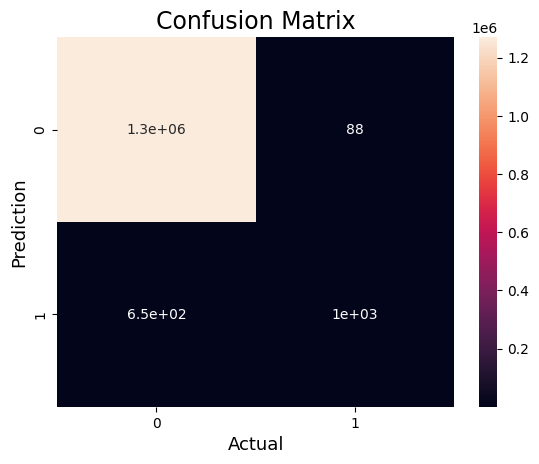

In [ ]:
y_pre = model_1.predict(X_test)

print("\nModel Report")
print(metrics.classification_report(y_test, y_pre))
# print(metrics.classification_report(y_test, y_pre))

cm = metrics.confusion_matrix(y_test, y_pre)
sns.heatmap(cm,
           annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

From the confusion matrix, we can see the model does not perform well on the imbalance data.

In the below cell, we observe the threshold and select the threshold which gives the better result.

In [ ]:
step_factor = 0.05
threshold_value = 0.2
roc_score=0

while threshold_value <=0.8:
    temp_thresh = threshold_value
    predicted = (y_pre_prob [:,1] >= temp_thresh).astype('int')
    print('Threshold',temp_thresh,'--',metrics.roc_auc_score(y_test, predicted))
    if roc_score < metrics.roc_auc_score(y_test, predicted):
        roc_score = metrics.roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.8903057953123759
Threshold 0.25 -- 0.8855117478835103
Threshold 0.3 -- 0.871943410044312
Threshold 0.35 -- 0.8653128418798732
Threshold 0.39999999999999997 -- 0.8553526294031051
Threshold 0.44999999999999996 -- 0.8329820675552779
Threshold 0.49999999999999994 -- 0.8045630792247768
Threshold 0.5499999999999999 -- 0.7628333822641968
Threshold 0.6 -- 0.7431796354319045
Threshold 0.65 -- 0.7223128197968051
Threshold 0.7000000000000001 -- 0.7065889567828552
Threshold 0.7500000000000001 -- 0.6966094661889533
---Optimum Threshold --- 0.2 --ROC-- 0.8903057953123759


In [ ]:
y_pre_new_threshold = (final_model_2.predict_proba(X_test)[:, 1] > 0.2).astype(int)
y_pre_new_threshold

array([0, 0, 0, ..., 0, 0, 0])


Model Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270871
           1       0.72      0.78      0.75      1653

    accuracy                           1.00   1272524
   macro avg       0.86      0.89      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



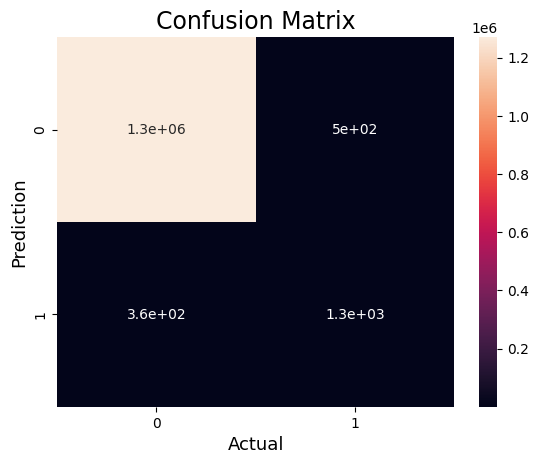

In [ ]:
print("\nModel Report")
print(metrics.classification_report(y_test, y_pre_new_threshold))
# print(metrics.classification_report(y_test, y_pre))

cm = metrics.confusion_matrix(y_test, y_pre_new_threshold)
sns.heatmap(cm,
           annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

From the confusion matrix, we can see that even after shifting the threshold value the model still not performing well.

Now we use the other method which is 'Oversampling and Undersampling' and see the results.

# **Oversampling and Undersampling**


In this process, two steps are Oversampling the data and Undersampling the data. In the first step we do oversampling and it is done on the minority data. In the second step, we do undersampling which is done on the data which is in majority.





### **Oversampling:**

In [ ]:
from sklearn.utils import resample

oversampled = resample(fraud_data[(fraud_data['isFraud']==1)],
                                 replace=True,
                                 n_samples= 8210*3,
                                 random_state=42)

df_oversampled = pd.concat([oversampled, fraud_data[(fraud_data['isFraud']==0)]])

### **Undersampling:**

In [ ]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
undersampled_X, undersampled_Y = undersample.fit_resample(df_oversampled.drop('isFraud', axis=1), df_oversampled['isFraud'])
undersampled = pd.concat([pd.DataFrame(undersampled_Y), pd.DataFrame(undersampled_X)], axis=1)
undersampled

,isFraud,type,amount,oldbalanceOrg,newbalanceOrig
0,0,1,0.01,0.00,0.0
1,0,1,277970.84,0.00,0.0
2,0,1,454859.34,0.00,0.0
3,0,1,149668.72,0.00,0.0
4,0,1,122101.47,0.00,0.0
...,...,...,...,...,...
49255,1,1,272637.22,272637.22,0.0
49256,1,1,224570.45,224570.45,0.0
49257,1,1,2468740.94,2468740.94,0.0
49258,1,3,654250.76,654250.76,0.0


In [ ]:
undersampled[['amount', 'oldbalanceOrg']] = undersampled[['amount', 'oldbalanceOrg']].round(2)
undersampled = undersampled.sample(frac=1).reset_index(drop=True)
undersampled.head(10)

,isFraud,type,amount,oldbalanceOrg,newbalanceOrig
0,0,3,112482.57,0.00,0.0
1,1,1,124582.58,124582.58,0.0
2,1,1,177429.18,177429.18,0.0
3,1,3,127447.68,127447.68,0.0
4,1,1,78741.64,78741.64,0.0
5,1,3,93253.25,93253.25,0.0
6,1,3,253261.36,253261.36,0.0
7,0,3,234263.07,0.00,0.0
8,0,5,30029.17,30009.00,0.0
9,0,1,122011.23,0.00,0.0


In [ ]:
X = undersampled.drop(['isFraud'], axis='columns')
y = undersampled.isFraud

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state = 0)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Model Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4904
           1       0.98      0.99      0.99      4948

    accuracy                           0.99      9852
   macro avg       0.99      0.99      0.99      9852
weighted avg       0.99      0.99      0.99      9852



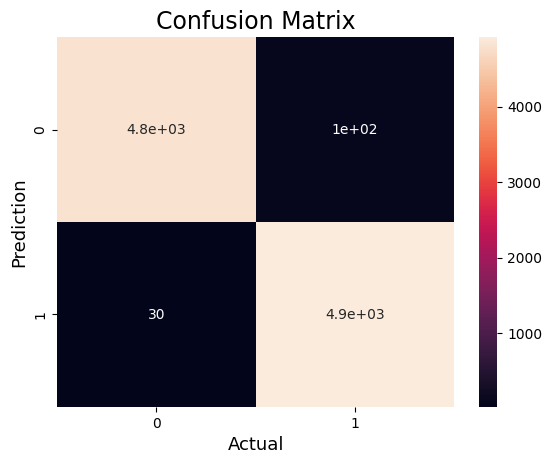

In [ ]:
model = XGBClassifier(
              learning_rate =0.1,
              n_estimators=10,
              max_depth=5,
              objective= 'binary:logistic',
              nthread=4,
              seed=27)





evaluation = [( X_train, y_train), ( X_test, y_test)]

model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False
            )

y_pre = model.predict(X_test)

print("\nModel Report")
print(metrics.classification_report(y_test, y_pre))
# print(metrics.classification_report(y_test, y_pre))

cm = metrics.confusion_matrix(y_test, y_pre)
sns.heatmap(cm,
           annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

From the confusion matrix, we can see that our model performs very well after the oversampling and undersampling.


Now we fine-tune this model by changing the parameters of the XGBoost algorithm.

### **Fine-Tuning**

In [ ]:
params = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
 'gamma':[i/10.0 for i in range(0,5)],
 'min_child_weight':[1,3,5,7],
 'max_depth':[4,5,6],
 'n_estimators': [50,100,200,500]
}

In [ ]:
model1 =  GridSearchCV(estimator =
          XGBClassifier(learning_rate =0.1,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27),
              param_grid = params,
              scoring='roc_auc',
              cv=3,
              verbose=10)

model1.fit(X_train, y_train)
model1.predict(X_test)
model1.best_params_, model1.best_score_

Streaming output truncated to the last 5000 lines.
[CV 3/3; 1327/2160] START colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.75
[CV 3/3; 1327/2160] END colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.75;, score=0.998 total time=   0.7s
[CV 1/3; 1328/2160] START colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8
[CV 1/3; 1328/2160] END colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.998 total time=   0.7s
[CV 2/3; 1328/2160] START colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8
[CV 2/3; 1328/2160] END colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.998 total time=   0.6s
[CV 3/3; 1328/2160] START colsample_bytree=0.8, gamma=0.4, max_depth=4, min_child_weight=5, n_estimators=200, 

({'colsample_bytree': 0.75,
  'gamma': 0.4,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 200,
  'subsample': 0.8},
 0.9984019888760364)

Now we get the best parameters, we change the parameter values and see the performance of the model.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Model Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4904
           1       0.98      0.99      0.99      4948

    accuracy                           0.99      9852
   macro avg       0.99      0.99      0.99      9852
weighted avg       0.99      0.99      0.99      9852



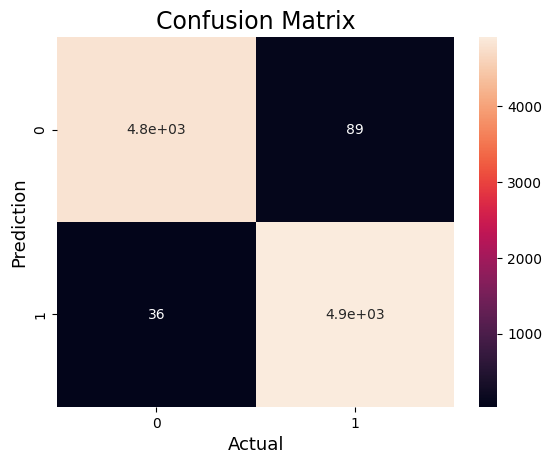

In [ ]:
final_model = XGBClassifier(
              learning_rate =0.1,
              n_estimators=200,
              max_depth=6,
              min_child_weight=1,
              gamma=0.4,
              subsample=0.8,
              colsample_bytree=0.75,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27)





evaluation = [( X_train, y_train), ( X_test, y_test)]

final_model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=3,verbose=False
            )

y_pre = final_model.predict(X_test)

print("\nModel Report")
print(metrics.classification_report(y_test, y_pre))
# print(metrics.classification_report(y_test, y_pre))

cm = metrics.confusion_matrix(y_test, y_pre)
sns.heatmap(cm,
           annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

From the confusion matrix, we can see that now our model performs very well as compared to all the above models.

# **Description**

This project is built to predict fraudulent transactions. In this project, we use the n CSV format having 6362620 rows and 10 columns. this project is done in various steps. These steps are:

**Step 1 -** In the first step we load the data and observe it. In the observation, we observe that:

   

> All the Fraudal Transactions are the type of CASH_OUT and TRANSFER.
  
   

> All the Fraudulent transactions are less than 1 crore.
   
  
> If the account balance is less than 1 crore then almost all the fraud transaction amounts are exactly as the bank balance.

   

> After the fraud transaction is done the updated bank balance is NILL











**Step 2 -** In the second step we check for the null values and the outliers and clean the data.

**Step 3 -** In the third step check the correlation between the features and by correlation values and by observation we choose 4 main features. These features are:
*   **type:** Although it does not have a good correlation value most of the fraud transactions are of type CASH_OUT and TRANSACTION and these transactions are about 45% of all the transactions.   

*   **amount:** It has the highest correlation value among all the features. In the fraud transactions, we can observe that the value of the amount is the same as the account balance of the customer.


*   **oldbalanceOrg:** It shows the bank balance of the customer before the transaction is made. In the case of fraud transactions, the amount and the bank balance are the same.
   
*   **newbalanceOrig**: It shows the bank balance of the customer after the transaction is made. In the case of fraud transactions, its value is 0 after the transaction.

**Step 4 -** In the fourth step we observed the fraud data distribution and found that the data is imbalanced. To solve this problem we use the two methods. These methods are:

*   Shifting the threshold for Predictions.
*   Oversampling and Undersampling the Data.


For the imbalanced data, the XGBoost is the well-suited and well-preferred algorithm. Therefore we use XGBoost algorithms in this project.

**Step 5 -** In the fifth step we split the data into training data and testing data and train the model. First, we train the model on imbalanced data and get a very bad result.


```
Model Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270871
           1       0.92      0.61      0.73      1653

    accuracy                           1.00   1272524
   macro avg       0.96      0.80      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524

```
Now we use Shifting the threshold technique and get the result:

```
Model Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270871
           1       0.72      0.78      0.75      1653

    accuracy                           1.00   1272524
   macro avg       0.86      0.89      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524
```
Now we use Oversampling and Undersampling techniques and get result:


```
Model Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4904
           1       0.98      0.99      0.99      4948

    accuracy                           0.99      9852
   macro avg       0.99      0.99      0.99      9852
weighted avg       0.99      0.99      0.99      9852
```
Now we get the better result its time to fine-tune the model.


**Step 6 -** In the sixth step we fine tune the model and get the result as:

```
Model Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4904
           1       0.98      0.99      0.99      4948

    accuracy                           0.99      9852
   macro avg       0.99      0.99      0.99      9852
weighted avg       0.99      0.99      0.99      9852
```
Our model is performing well. Let's implement it in our company and take our business to new heights.


### **What kind of prevention should be adopted while company update its infrastructure?**



*   Implement the Fraud Detection System.
*   Implement strict access controls, limiting access to sensitive systems and data based on job roles and responsibilities. Regularly review and update user permissions.

*   Work closely on the payment processes.
*   Build a team that can take action immediatly on the fraudual transactions.

*   Deploy real-time transaction monitoring systems to identify and flag unusual or suspicious activitie
*   Train the emloyes, as they can observe the transaction.








### **Assuming these actions have been implemented, how would you determine if they work?**



*   Regularly monitor and analyze security incidents and alerts.
*   Assess the rates of false positives and false negatives in the fraud detection system. An effective system should minimize false positives and false negatives
*   Conduct regular analysis of transaction data to identify patterns or anomalies.
*   Gather feedback from customers regarding their experiences with security measures.



